In [83]:
import numpy as np
from keras import models, layers, optimizers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.applications import VGG16
from PIL import Image

In [96]:
def compile_train_plot_conf(network, tr_gen, val_gen):
    network.compile(loss='binary_crossentropy',
                    optimizer=optimizers.RMSprop(learning_rate=1e-4),
                    metrics=['accuracy'])
    history = model.fit_generator(
        tr_gen,
        steps_per_epoch=30,
        epochs=15,
        validation_data=val_gen,
        workers=-1)
    print(history.history.keys())

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))
    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'y', label='Training loss')
    plt.plot(epochs, val_loss, 'g', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

In [97]:
train_datagen = ImageDataGenerator(rescale=1. / 255)
validation_datagen = ImageDataGenerator(rescale=1. / 255)

test_dir = 'chest_xray/test'
train_dir = 'chest_xray/train'
validation_dir = 'chest_xray/val'

img_dim = 256

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_dim, img_dim),
    batch_size=20,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_dim, img_dim),
    batch_size=16,
    class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


# Basic Model

In [98]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3),
                        activation='relu',
                        input_shape=(img_dim, img_dim, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_60 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_61 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_61 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_62 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_62 (MaxPoolin  (None, 30, 30, 128)    

Epoch 1/15


/tmp/ipykernel_24548/2304355245.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


30/30 [==============================] - 12s 357ms/step - loss: 0.6118 - accuracy: 0.7417 - val_loss: 0.9915 - val_accuracy: 0.5000
Epoch 2/15
30/30 [==============================] - 10s 341ms/step - loss: 0.4945 - accuracy: 0.7550 - val_loss: 0.7279 - val_accuracy: 0.6250
Epoch 3/15
30/30 [==============================] - 10s 345ms/step - loss: 0.3457 - accuracy: 0.8517 - val_loss: 0.7594 - val_accuracy: 0.5625
Epoch 4/15
30/30 [==============================] - 10s 346ms/step - loss: 0.2846 - accuracy: 0.8683 - val_loss: 0.6279 - val_accuracy: 0.6250
Epoch 5/15
30/30 [==============================] - 10s 344ms/step - loss: 0.1733 - accuracy: 0.9463 - val_loss: 1.0562 - val_accuracy: 0.6250
Epoch 6/15
30/30 [==============================] - 11s 360ms/step - loss: 0.1823 - accuracy: 0.9383 - val_loss: 0.4736 - val_accuracy: 0.8125
Epoch 7/15
30/30 [==============================] - 11s 355ms/step - loss: 0.1292 - accuracy: 0.9430 - val_loss: 0.4611 - val_accuracy: 0.8750
Epoch 8/15

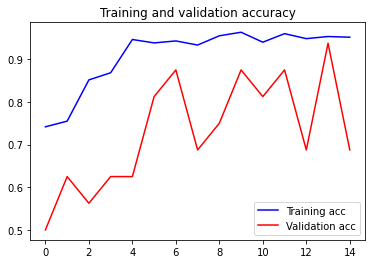

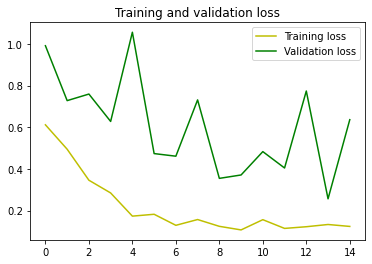

In [99]:
compile_train_plot_conf(network=model, tr_gen=train_generator, val_gen=validation_generator)

# Basic Model + Augmentation

In [102]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.3,
    fill_mode='nearest')
# no Horizontal Flip :)

validation_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator_datagen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_dim, img_dim),
    batch_size=20,
    class_mode='binary')

validation_generator_datagen = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_dim, img_dim),
    batch_size=16,
    class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


/tmp/ipykernel_24548/2304355245.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/15
30/30 [==============================] - 20s 630ms/step - loss: 0.2500 - accuracy: 0.9000 - val_loss: 0.5842 - val_accuracy: 0.6875
Epoch 2/15
30/30 [==============================] - 18s 577ms/step - loss: 0.2360 - accuracy: 0.8950 - val_loss: 0.3419 - val_accuracy: 0.8125
Epoch 3/15
30/30 [==============================] - 17s 551ms/step - loss: 0.2759 - accuracy: 0.8792 - val_loss: 0.7077 - val_accuracy: 0.6250
Epoch 4/15
30/30 [==============================] - 16s 540ms/step - loss: 0.2873 - accuracy: 0.8758 - val_loss: 0.4533 - val_accuracy: 0.7500
Epoch 5/15
30/30 [==============================] - 17s 558ms/step - loss: 0.2470 - accuracy: 0.9000 - val_loss: 0.5401 - val_accuracy: 0.6875
Epoch 6/15
30/30 [==============================] - 17s 559ms/step - loss: 0.2066 - accuracy: 0.9067 - val_loss: 0.5343 - val_accuracy: 0.6875
Epoch 7/15
30/30 [==============================] - 17s 553ms/step - loss: 0.2192 - accuracy: 0.9050 - val_loss: 0.5403 - val_accuracy: 0.7500

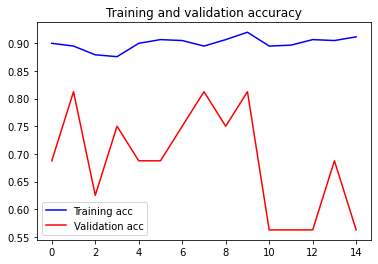

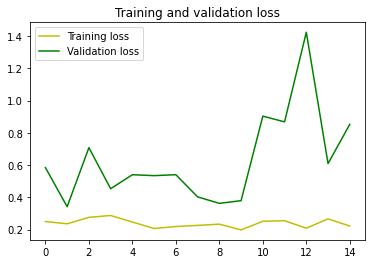

In [103]:
compile_train_plot_conf(network=model, tr_gen=train_generator_datagen, val_gen=validation_generator_datagen)

In [104]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(img_dim, img_dim, 3))

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [105]:
conv_base.trainable = False

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# VGG16 + Augmentation (Transfer Learning)


Epoch 1/15


/tmp/ipykernel_24548/2304355245.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


30/30 [==============================] - 81s 3s/step - loss: 0.3866 - accuracy: 0.8500 - val_loss: 0.5610 - val_accuracy: 0.6875
Epoch 2/15
30/30 [==============================] - 81s 3s/step - loss: 0.1770 - accuracy: 0.9350 - val_loss: 0.3347 - val_accuracy: 0.8125
Epoch 3/15
30/30 [==============================] - 74s 2s/step - loss: 0.1975 - accuracy: 0.9217 - val_loss: 0.4932 - val_accuracy: 0.6875
Epoch 4/15
30/30 [==============================] - 76s 3s/step - loss: 0.0992 - accuracy: 0.9517 - val_loss: 1.0415 - val_accuracy: 0.6250
Epoch 5/15
30/30 [==============================] - 81s 3s/step - loss: 0.1313 - accuracy: 0.9450 - val_loss: 0.5224 - val_accuracy: 0.7500
Epoch 6/15
30/30 [==============================] - 80s 3s/step - loss: 0.0880 - accuracy: 0.9683 - val_loss: 0.9206 - val_accuracy: 0.6250
Epoch 7/15
30/30 [==============================] - 77s 3s/step - loss: 0.1175 - accuracy: 0.9547 - val_loss: 0.1469 - val_accuracy: 0.8750
Epoch 8/15
30/30 [=============

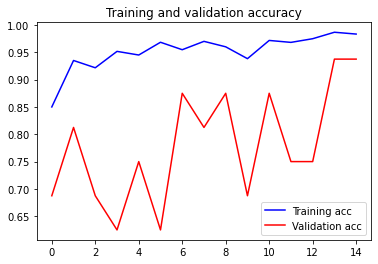

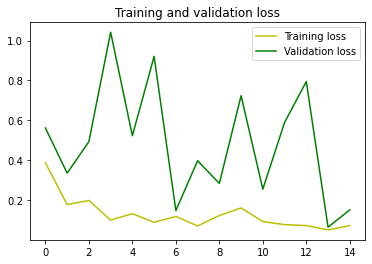

In [106]:
compile_train_plot_conf(network=model, tr_gen=train_generator, val_gen=validation_generator)

In [107]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

# Fine tuning


Epoch 1/15


/tmp/ipykernel_24548/2304355245.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


30/30 [==============================] - 85s 3s/step - loss: 0.8314 - accuracy: 0.9000 - val_loss: 0.2154 - val_accuracy: 0.8750
Epoch 2/15
30/30 [==============================] - 84s 3s/step - loss: 0.1046 - accuracy: 0.9667 - val_loss: 0.5437 - val_accuracy: 0.7500
Epoch 3/15
30/30 [==============================] - 84s 3s/step - loss: 0.1246 - accuracy: 0.9500 - val_loss: 0.1375 - val_accuracy: 0.9375
Epoch 4/15
30/30 [==============================] - 84s 3s/step - loss: 0.0769 - accuracy: 0.9700 - val_loss: 0.0540 - val_accuracy: 1.0000
Epoch 5/15
30/30 [==============================] - 85s 3s/step - loss: 0.0722 - accuracy: 0.9800 - val_loss: 0.2374 - val_accuracy: 0.8750
Epoch 6/15
30/30 [==============================] - 86s 3s/step - loss: 0.0850 - accuracy: 0.9700 - val_loss: 0.0104 - val_accuracy: 1.0000
Epoch 7/15
30/30 [==============================] - 87s 3s/step - loss: 0.0625 - accuracy: 0.9800 - val_loss: 0.7332 - val_accuracy: 0.8125
Epoch 8/15
30/30 [=============

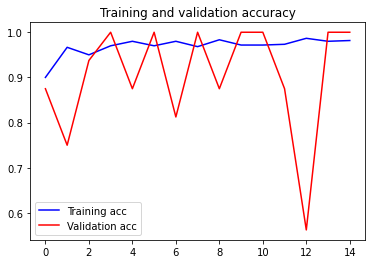

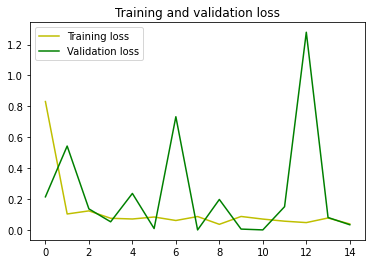

In [108]:
compile_train_plot_conf(network=model, tr_gen=train_generator, val_gen=validation_generator)

# Testing on image not from dataset

In [109]:
img = Image.open("self_chest_xray.png").convert("RGB")
img = img.resize((img_dim, img_dim))
img_arr = np.array(img)
img_arr = img_arr.reshape((1,) + img_arr.shape)
model.predict(img_arr)

1/1 [==============================] - 0s 272ms/step


array([[1.]], dtype=float32)

In [110]:
img = Image.open("self_chest_xray_sick.png").convert("RGB")
img = img.resize((img_dim, img_dim))
img_arr = np.array(img)
img_arr = img_arr.reshape((1,) + img_arr.shape)
model.predict(img_arr)

1/1 [==============================] - 0s 188ms/step


array([[1.]], dtype=float32)